## Task
Cercetarea fiecărei coloane împreună și separarat în relația cu colaona type. Eu recomand să utilizați următorii parametri.

*  Media
* Mediana.
* Moda.
* Deviația standartă.
* Variația.
* Range. 

Găsește coloanele cu cea mai mare corelație absoluta cu coloana type și încearcă sa explici de ce aceasta se întâmplă (aici poți utliza literatura despre vin).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importam biblioteci necesare

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# connectez google drive

Mounted at /content/drive


In [19]:
#import
df = pd.read_csv('/content/drive/MyDrive/1.USARB/SI_Maidacenco/Lab 4 SI /wine-quality-white-and-red.csv')

In [20]:
#afisarea
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#afisarea informatiei
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#verificarea daca sunt valori null
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Делаем вывод что пустых ячеек нет 
и нет необходимости делать df = df.dropna()

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
alcohol = df['alcohol'].value_counts()

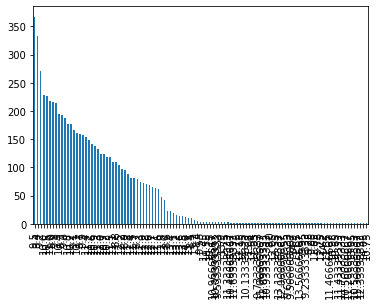

In [ ]:
alcohol.plot(kind='bar')

In [ ]:
df['residual sugar'].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
12.05      1
6.95       1
9.55       1
20.15      1
3.45       1
Name: residual sugar, Length: 316, dtype: int64

In [ ]:
#Frequency.
freq=df['pH'].value_counts()

freq

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
2.72      1
3.85      1
3.82      1
3.81      1
3.79      1
Name: pH, Length: 108, dtype: int64

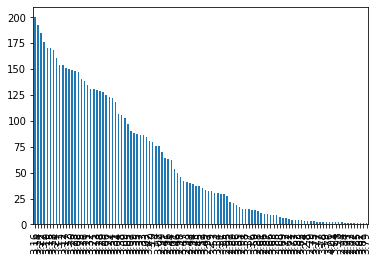

In [ ]:
freq.plot(kind='bar')


In [ ]:
qual = df['quality'].describe()


## Generarea statisticii descriptive.

In [ ]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# я решила изменить столбец type на числовые значения
## white = 1
## red = 2

In [5]:
#import
dfm = pd.read_csv('/content/drive/MyDrive/1.USARB/SI_Maidacenco/Lab 4 SI /wine-quality-white-red.csv')

In [ ]:
dfm

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Frequency.
type_w = dfm['type'].value_counts()

type_w

1    4898
2    1599
Name: type, dtype: int64

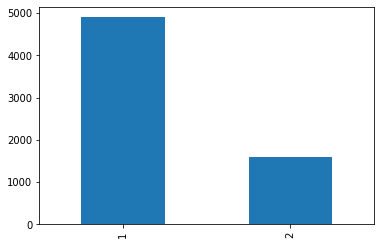

In [ ]:
#Визуализируем соотношение белого и красного вина
type_w.plot(kind='bar') 
# 1 - white wine
# 2 - red wine

## Делаем вывод что белого вина больше

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


## Фиксированная кислотность: 
кислоты являются основными свойствами вина и вносят большой вклад в вкус вина. Обычно общая кислотность делится на две группы: летучие кислоты и нелетучие или фиксированные кислоты. Среди основных кислот, которые вы можете найти в винах: винная, яблочная, лимонная и янтарная. Эта переменная выражена в г (винная кислота) / дм³ в наборах данных.


(array([  63., 1151., 3248., 1339.,  382.,  177.,   82.,   41.,    7.,
           7.]),
 array([ 3.8 ,  5.01,  6.22,  7.43,  8.64,  9.85, 11.06, 12.27, 13.48,
        14.69, 15.9 ]),
 <a list of 10 Patch objects>)

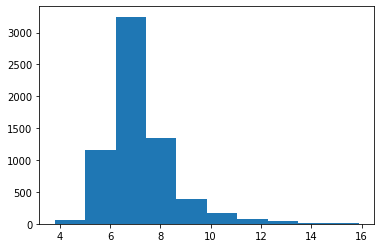

In [ ]:
#визуализируем расппределение фиксированной кислотности 
plt.hist(df['fixed acidity'])

## Летучая кислотность: 
изменчивая кислотность - это процесс превращения вина в уксус. В США допустимые пределы содержания летучей кислоты составляют 1,2 г / л для красного столового вина и 1,1 г / л для белого столового вина. В этих данных летучая кислотность выражается в г (уксусная кислота) / дм³

(array([1.580e+03, 3.002e+03, 9.960e+02, 6.060e+02, 2.140e+02, 7.000e+01,
        2.300e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0.08, 0.23, 0.38, 0.53, 0.68, 0.83, 0.98, 1.13, 1.28, 1.43, 1.58]),
 <a list of 10 Patch objects>)

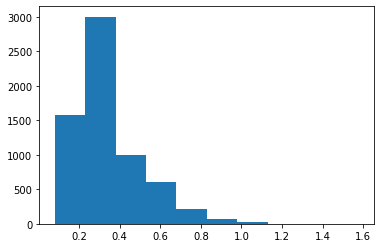

In [ ]:
plt.hist(df['volatile acidity'])

## Лимонная кислота
является одной из фиксированных кислот, которые вы найдете в винах. Выражается в г / дм3.

(array([7.660e+02, 3.113e+03, 2.059e+03, 4.200e+02, 1.260e+02, 5.000e+00,
        6.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.166, 0.332, 0.498, 0.664, 0.83 , 0.996, 1.162, 1.328,
        1.494, 1.66 ]),
 <a list of 10 Patch objects>)

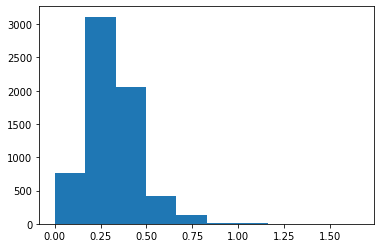

In [ ]:
plt.hist(df['citric acid'])

## Остаточный сахар
обычно относится к сахару, остающемуся после прекращения брожения или прекращения. Выражается в г / дм3.

(array([4.551e+03, 1.396e+03, 5.330e+02, 1.400e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.6 ,  7.12, 13.64, 20.16, 26.68, 33.2 , 39.72, 46.24, 52.76,
        59.28, 65.8 ]),
 <a list of 10 Patch objects>)

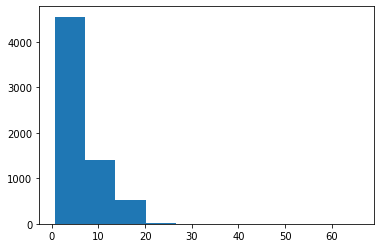

In [ ]:
plt.hist(df['residual sugar'])

## Хлориды
могут быть основным фактором солености в вине. Здесь вы увидите, что оно выражено в г (хлорид натрия) / дм3.

(array([5.061e+03, 1.279e+03, 9.200e+01, 3.400e+01, 8.000e+00, 9.000e+00,
        1.000e+01, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([0.009 , 0.0692, 0.1294, 0.1896, 0.2498, 0.31  , 0.3702, 0.4304,
        0.4906, 0.5508, 0.611 ]),
 <a list of 10 Patch objects>)

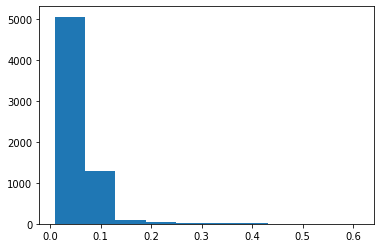

In [ ]:
plt.hist(df['chlorides'])

## Качество
Эксперты оценили качество вина между 0 (очень плохо) и 10 (очень отлично). 

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

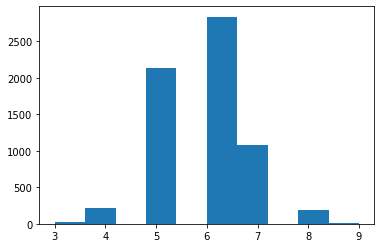

In [ ]:
plt.hist(df['quality'])

## Свободный диоксид серы
Говорят, что часть диоксида серы, которая добавляется в вино и которая теряется в нем, связана, а активная часть считается свободной. Винодел всегда будет пытаться получить наибольшую долю свободной серы для связывания. Эти переменные выражены в мг / дм3 в данных.

(array([3.392e+03, 2.676e+03, 4.010e+02, 2.000e+01, 6.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  29.8,  58.6,  87.4, 116.2, 145. , 173.8, 202.6, 231.4,
        260.2, 289. ]),
 <a list of 10 Patch objects>)

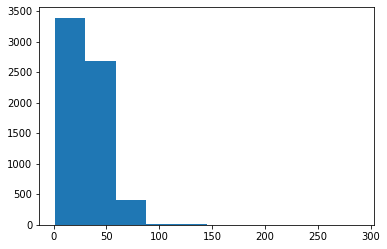

In [ ]:
plt.hist(df['free sulfur dioxide'])

## Общая двуокись серы
сумма связанного и свободного диоксида серы (SO2). Здесь оно выражено в мг / дм3. Существуют законные пределы содержания серы в винах: в ЕС красные вина могут иметь только 160 мг / л, в то время как белые и розовые вина могут иметь около 210 мг / л. Сладкие вина могут иметь 400 мг / л. Для США законодательные ограничения установлены на уровне 350 мг / л, а для Австралии - 250 мг / л.

(array([1.088e+03, 9.790e+02, 2.049e+03, 1.514e+03, 7.210e+02, 1.340e+02,
        8.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  6. ,  49.4,  92.8, 136.2, 179.6, 223. , 266.4, 309.8, 353.2,
        396.6, 440. ]),
 <a list of 10 Patch objects>)

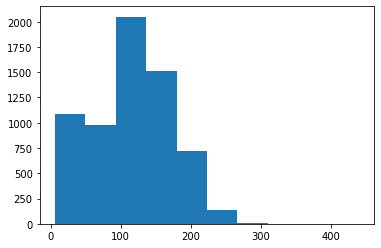

In [ ]:
plt.hist(df['total sulfur dioxide'])

## плотность
обычно используется в качестве меры превращения сахара в алкоголь. Здесь это выражено в г / см3.

(array([1.599e+03, 3.645e+03, 1.241e+03, 9.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.98711 , 0.992297, 0.997484, 1.002671, 1.007858, 1.013045,
        1.018232, 1.023419, 1.028606, 1.033793, 1.03898 ]),
 <a list of 10 Patch objects>)

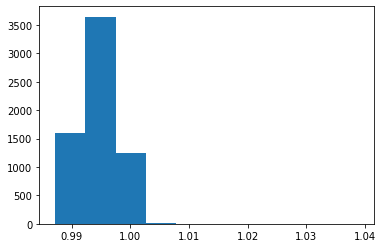

In [ ]:
plt.hist(df['density'])

## pH
или потенциал водорода представляет собой числовую шкалу для указания кислотности или основности вина. Как вы, возможно, знаете, растворы с pH ниже 7 являются кислыми, а растворы с pH выше 7 являются основными. При pH 7 чистая вода является нейтральной. Большинство вин имеют рН от 2,9 до 3,9 и поэтому являются кислыми.

(array([  16.,  334., 1233., 2111., 1663.,  802.,  263.,   59.,   12.,
           4.]),
 array([2.72 , 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.752,
        3.881, 4.01 ]),
 <a list of 10 Patch objects>)

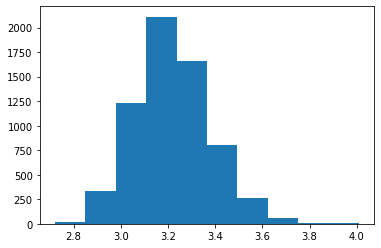

In [ ]:
plt.hist(df['pH'])

## Сульфаты
это естественный результат жизнедеятельности дрожжей, сбраживающих сахар в вине в алкоголь В этом случае они выражаются в г (сульфат калия) / дм3.

(array([1023., 3451., 1540.,  382.,   66.,   21.,    6.,    4.,    0.,
           4.]),
 array([0.22 , 0.398, 0.576, 0.754, 0.932, 1.11 , 1.288, 1.466, 1.644,
        1.822, 2.   ]),
 <a list of 10 Patch objects>)

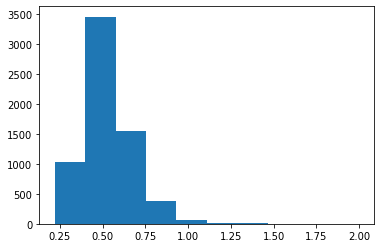

In [ ]:
plt.hist(df['sulphates'])

## Алкоголь
Вино - это алкогольный напиток, и, как вы знаете, процент алкоголя может варьироваться от вина к вину. Oна выражена в % .

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.092e+03, 6.280e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <a list of 10 Patch objects>)

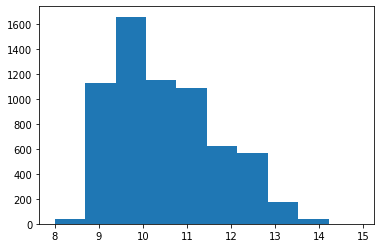

In [ ]:
plt.hist(df['alcohol'])

(array([[3.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00],
        [9.420e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.910e+02],
        [1.107e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 5.550e+02],
        [8.640e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.920e+02],
        [8.140e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.780e+02],
        [4.760e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.520e+02],
        [4.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 9.000e+01],
        [1.500e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

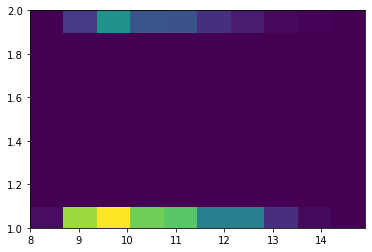

In [ ]:
plt.hist2d(dfm['alcohol'], dfm['type'])

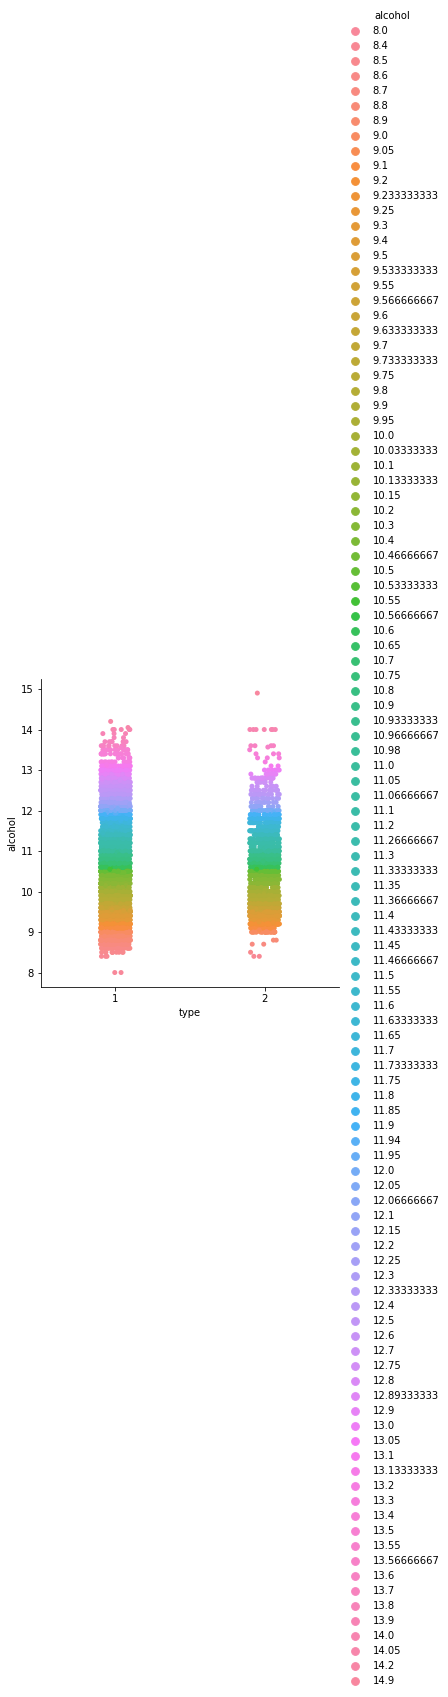

In [ ]:
sns.catplot(x="type", y="alcohol", hue="alcohol", data = dfm)

(array([[  3.,   5.,   0.,  21.,   0.,   7.,   3.,   0.,   1.,   0.],
        [  3.,  42.,   0., 591.,   0., 397.,  83.,   0.,  17.,   0.],
        [  8.,  62.,   0., 869.,   0., 648.,  69.,   0.,   6.,   0.],
        [  6.,  47.,   0., 355.,   0., 591., 141.,   0.,  15.,   1.],
        [  6.,  37.,   0., 211.,   0., 555., 253.,   0.,  30.,   0.],
        [  2.,  15.,   0.,  61.,   0., 298., 214.,   0.,  38.,   0.],
        [  2.,   5.,   0.,  18.,   0., 271., 212.,   0.,  58.,   3.],
        [  0.,   3.,   0.,  10.,   0.,  56.,  80.,   0.,  25.,   1.],
        [  0.,   0.,   0.,   1.,   0.,  13.,  24.,   0.,   3.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7fc305f1c910>)

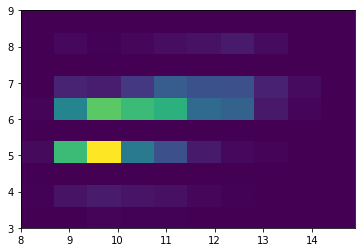

In [ ]:
plt.hist2d(dfm['alcohol'], dfm['quality'])

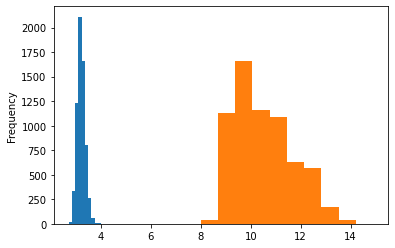

In [12]:
 # Значение pH
dfm['pH'].plot(kind='hist');
 # Содержание алкоголя
dfm['alcohol'].plot(kind='hist');
 

Время построить матрицу корреляции. Это позволит быстрее понять, какие переменные коррелируют.

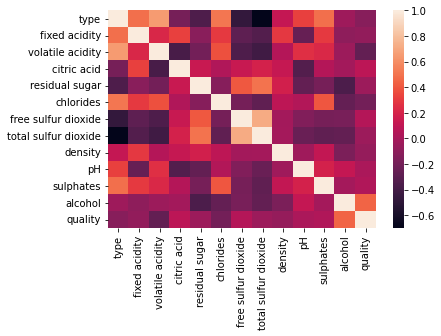

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
corr = dfm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

Мы видим самую сильную зависимость между 
total sulfur dioxide/ free sulfur dioxide - type 
type - residual sugar

In [18]:
def dtype(x):
    if x <2.9:
                 return print("low")
    elif x >=2.9 and x <= 3.9:
                 print ("normal")
    elif x > 3.9:
                 return print("hight")
dfm['temp'] = dfm['pH'].map(lambda x:dtype(x))

Выходные данные были обрезаны до нескольких последних строк (5000).
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
low
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
norm

## Separam dataset la white wine

In [24]:
filter_white = df['type'].isin(["white"])
white = df[filter_white]
white

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Separam dataset la red wine

In [25]:
filter_red = df['type'].isin(["red"])
red = df[filter_red]
red

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Проанализируем содержание алкоголя в белом и красном вине
Как вы можете видеть на изображении ниже, уровни алкоголя между красным и белым вином в основном одинаковы: в них содержится около 9% алкоголя. Конечно, есть также значительное количество, в которых процент алкоголя составляет 10 или 11%.

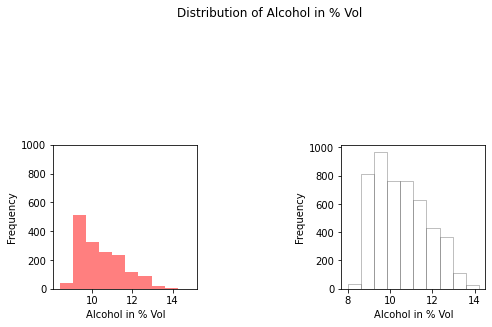

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

## Проанализируем содержание сульфатов в белом и красном вине

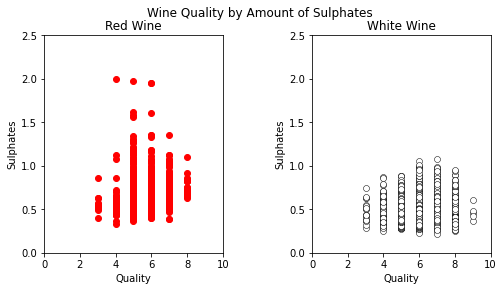

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Помимо сульфатов, кислотность является одной из основных и жизненно важных характеристик вина, необходимых для получения качественных вин. Экстремальная летучая кислотность означает серьезное испорченное вино.

Давайте проверим данные и построим точечную диаграмму, которая отображает соотношение спирта и летучей кислотности. Точки данных должны быть окрашены в соответствии с их рейтингом.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

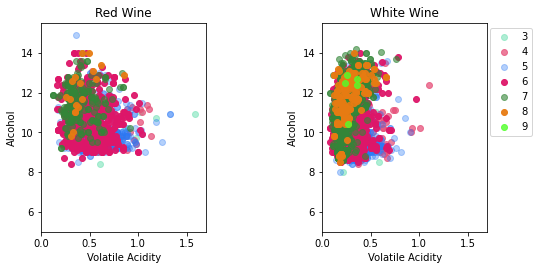

In [28]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()